In [1]:
from taxi import TaxiEnv
import numpy as np

env = TaxiEnv()

In [2]:
# display the game state
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
import numpy as np
n_states = env.observation_space.n
n_actions = env.action_space.n
def get_random_policy():
    """
    Build a numpy array representing agent policy.
    This array must have one element per each of 16 environment states.
    Element must be an integer from 0 to 3, representing action
    to take from that state.
    """
    return np.random.randint(0, n_actions, n_states)

### Let's evaluate!
* Implement a simple function that runs one game and returns the total reward

In [6]:
def sample_reward(env, policy, t_max=200):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    s = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [7]:
def evaluate(env, policy, n_times=100):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy))
    return float(np.mean(np.array(rewards)))      

# Part II Genetic algorithm 

The next task is to devise some more effecient way to perform policy search.
We'll do that with a bare-bones evolutionary algorithm.
[unless you're feeling masochistic and wish to do something entirely different which is bonus points if it works]

In [9]:
def crossover(policy1, policy2, p=0.5):
    """
    for each state, with probability p take action from policy1, else policy2
    """
    cross_policy = []
    
    return np.choose(np.random.choice(np.array([0, 1]), 
                     size = policy1.shape, 
                     p = [p, 1-p]),
                     choices=[policy1, policy2])

In [10]:
def mutation(policy, p=0.1):
    """
    for each state, with probability p replace action with random action
    Tip: mutation can be written as crossover with random policy
    """
#     <your code>
    return crossover(get_random_policy(), policy, p)
    

In [79]:
n_epochs = 100 #how many cycles to make
pool_size = 100 #how many policies to maintain
n_crossovers = 50 #how many crossovers to make on each step
n_mutations = 50 #how many mutations to make on each tick

In [80]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


In [81]:
assert type(pool) == type(pool_scores) == list
assert len(pool) == len(pool_scores) == pool_size
assert all([type(score) in (float, int) for score in pool_scores])


In [82]:
from random import choice
from tqdm import tqdm

In [84]:
epoch_scores = []

hello


In [85]:
from matplotlib import pylab as plt
import pandas as pd
%matplotlib inline

In [86]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])    

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 0:
best score: -774.47


  1%|▊                                                                               | 1/100 [00:51<1:25:32, 51.84s/it]

Epoch 1:
best score: -828.56


  2%|█▌                                                                              | 2/100 [01:41<1:23:40, 51.23s/it]

Epoch 2:
best score: -773.93


  3%|██▍                                                                             | 3/100 [02:51<1:31:37, 56.68s/it]

Epoch 3:
best score: -738.29


  4%|███▏                                                                            | 4/100 [03:40<1:27:09, 54.48s/it]

Epoch 4:
best score: -810.11


  5%|████                                                                            | 5/100 [04:29<1:23:51, 52.96s/it]

Epoch 5:
best score: -774.47


  6%|████▊                                                                           | 6/100 [05:19<1:21:27, 52.00s/it]

Epoch 6:
best score: -702.56


  7%|█████▌                                                                          | 7/100 [06:12<1:20:59, 52.25s/it]

Epoch 7:
best score: -720.56


  8%|██████▍                                                                         | 8/100 [07:03<1:19:33, 51.88s/it]

Epoch 8:
best score: -649.01


  9%|███████▏                                                                        | 9/100 [07:54<1:18:06, 51.51s/it]

Epoch 9:
best score: -630.29


 10%|███████▉                                                                       | 10/100 [08:46<1:17:36, 51.74s/it]

Epoch 10:
best score: -577.01


 11%|████████▋                                                                      | 11/100 [09:45<1:20:12, 54.07s/it]

Epoch 11:
best score: -666.56


 12%|█████████▍                                                                     | 12/100 [10:44<1:21:22, 55.48s/it]

Epoch 12:
best score: -647.93


 13%|██████████▎                                                                    | 13/100 [11:39<1:20:10, 55.29s/it]

Epoch 13:
best score: -667.37


 14%|███████████                                                                    | 14/100 [12:33<1:18:39, 54.88s/it]

Epoch 14:
best score: -577.1


 15%|███████████▊                                                                   | 15/100 [13:33<1:20:06, 56.55s/it]

Epoch 15:
best score: -541.64


 16%|████████████▋                                                                  | 16/100 [14:28<1:18:33, 56.11s/it]

Epoch 16:
best score: -575.75


 17%|█████████████▍                                                                 | 17/100 [15:20<1:15:43, 54.75s/it]

Epoch 17:
best score: -577.28


 18%|██████████████▏                                                                | 18/100 [16:19<1:16:37, 56.07s/it]

Epoch 18:
best score: -576.2


 19%|███████████████                                                                | 19/100 [17:14<1:15:03, 55.59s/it]

Epoch 19:
best score: -612.47


 20%|███████████████▊                                                               | 20/100 [18:11<1:14:49, 56.12s/it]

Epoch 20:
best score: -523.19


 21%|████████████████▌                                                              | 21/100 [19:11<1:15:15, 57.16s/it]

Epoch 21:
best score: -522.65


 22%|█████████████████▍                                                             | 22/100 [20:06<1:13:38, 56.65s/it]

Epoch 22:
best score: -559.19


 23%|██████████████████▏                                                            | 23/100 [21:05<1:13:40, 57.40s/it]

Epoch 23:
best score: -523.1


 24%|██████████████████▉                                                            | 24/100 [21:59<1:11:31, 56.47s/it]

Epoch 24:
best score: -505.01


 25%|███████████████████▊                                                           | 25/100 [23:04<1:13:39, 58.93s/it]

Epoch 25:
best score: -505.28


 26%|████████████████████▌                                                          | 26/100 [24:02<1:12:25, 58.73s/it]

Epoch 26:
best score: -486.56


 27%|█████████████████████▎                                                         | 27/100 [24:58<1:10:11, 57.69s/it]

Epoch 27:
best score: -469.55


 28%|██████████████████████                                                         | 28/100 [25:59<1:10:34, 58.82s/it]

Epoch 28:
best score: -487.1


 29%|██████████████████████▉                                                        | 29/100 [27:01<1:10:40, 59.72s/it]

Epoch 29:
best score: -487.19


 30%|███████████████████████▋                                                       | 30/100 [27:56<1:07:59, 58.28s/it]

Epoch 30:
best score: -487.37


 31%|████████████████████████▍                                                      | 31/100 [28:49<1:05:23, 56.86s/it]

Epoch 31:
best score: -451.82


 32%|█████████████████████████▎                                                     | 32/100 [29:44<1:03:31, 56.06s/it]

Epoch 32:
best score: -451.28


 33%|██████████████████████████                                                     | 33/100 [30:38<1:02:03, 55.58s/it]

Epoch 33:
best score: -469.46


 34%|██████████████████████████▊                                                    | 34/100 [31:33<1:00:53, 55.36s/it]

Epoch 34:
best score: -451.37


 35%|████████████████████████████▎                                                    | 35/100 [32:28<59:59, 55.38s/it]

Epoch 35:
best score: -379.82


 36%|█████████████████████████████▏                                                   | 36/100 [33:22<58:40, 55.01s/it]

Epoch 36:
best score: -433.55


 37%|█████████████████████████████▉                                                   | 37/100 [34:16<57:11, 54.47s/it]

Epoch 37:
best score: -361.64


 38%|██████████████████████████████▊                                                  | 38/100 [35:11<56:35, 54.76s/it]

Epoch 38:
best score: -397.46


 39%|███████████████████████████████▌                                                 | 39/100 [36:06<55:38, 54.73s/it]

Epoch 39:
best score: -379.82


 40%|████████████████████████████████▍                                                | 40/100 [37:00<54:29, 54.49s/it]

Epoch 40:
best score: -379.64


 41%|█████████████████████████████████▏                                               | 41/100 [37:54<53:30, 54.42s/it]

Epoch 41:
best score: -379.82


 42%|██████████████████████████████████                                               | 42/100 [38:50<53:13, 55.05s/it]

Epoch 42:
best score: -361.37


 43%|██████████████████████████████████▊                                              | 43/100 [39:45<52:15, 55.02s/it]

Epoch 43:
best score: -343.91


 44%|███████████████████████████████████▋                                             | 44/100 [40:40<51:09, 54.82s/it]

Epoch 44:
best score: -325.91


 45%|████████████████████████████████████▍                                            | 45/100 [41:33<49:55, 54.47s/it]

Epoch 45:
best score: -343.91


 46%|█████████████████████████████████████▎                                           | 46/100 [42:28<48:59, 54.44s/it]

Epoch 46:
best score: -361.82


 47%|██████████████████████████████████████                                           | 47/100 [43:22<48:01, 54.37s/it]

Epoch 47:
best score: -343.82


 48%|██████████████████████████████████████▉                                          | 48/100 [44:16<47:09, 54.41s/it]

Epoch 48:
best score: -379.55


 49%|███████████████████████████████████████▋                                         | 49/100 [45:10<46:04, 54.21s/it]

Epoch 49:
best score: -325.91


 50%|████████████████████████████████████████▌                                        | 50/100 [46:06<45:32, 54.65s/it]

Epoch 50:
best score: -289.91


 51%|█████████████████████████████████████████▎                                       | 51/100 [47:00<44:32, 54.53s/it]

Epoch 51:
best score: -290.0


 52%|██████████████████████████████████████████                                       | 52/100 [47:54<43:26, 54.31s/it]

Epoch 52:
best score: -289.82


 53%|██████████████████████████████████████████▉                                      | 53/100 [48:47<42:18, 54.01s/it]

Epoch 53:
best score: -307.91


 54%|███████████████████████████████████████████▋                                     | 54/100 [49:42<41:36, 54.28s/it]

Epoch 54:
best score: -271.73


 55%|████████████████████████████████████████████▌                                    | 55/100 [50:36<40:36, 54.14s/it]

Epoch 55:
best score: -289.82


 56%|█████████████████████████████████████████████▎                                   | 56/100 [51:29<39:31, 53.91s/it]

Epoch 56:
best score: -325.82


 57%|██████████████████████████████████████████████▏                                  | 57/100 [52:23<38:39, 53.93s/it]

Epoch 57:
best score: -325.91


 58%|██████████████████████████████████████████████▉                                  | 58/100 [53:18<37:51, 54.08s/it]

Epoch 58:
best score: -271.46


 59%|███████████████████████████████████████████████▊                                 | 59/100 [54:12<36:55, 54.05s/it]

Epoch 59:
best score: -290.0


 60%|████████████████████████████████████████████████▌                                | 60/100 [55:06<36:03, 54.10s/it]

Epoch 60:
best score: -271.91


 61%|█████████████████████████████████████████████████▍                               | 61/100 [56:00<35:12, 54.18s/it]

Epoch 61:
best score: -325.64


 62%|██████████████████████████████████████████████████▏                              | 62/100 [56:55<34:23, 54.29s/it]

Epoch 62:
best score: -289.91


 63%|███████████████████████████████████████████████████                              | 63/100 [57:49<33:22, 54.14s/it]

Epoch 63:
best score: -289.19


 64%|███████████████████████████████████████████████████▊                             | 64/100 [58:43<32:32, 54.23s/it]

Epoch 64:
best score: -235.37


 65%|████████████████████████████████████████████████████▋                            | 65/100 [59:36<31:28, 53.96s/it]

Epoch 65:
best score: -253.82


 66%|████████████████████████████████████████████████████▏                          | 66/100 [1:00:29<30:20, 53.54s/it]

Epoch 66:
best score: -307.55


 67%|████████████████████████████████████████████████████▉                          | 67/100 [1:01:23<29:30, 53.66s/it]

Epoch 67:
best score: -253.91


 68%|█████████████████████████████████████████████████████▋                         | 68/100 [1:02:18<28:51, 54.09s/it]

Epoch 68:
best score: -253.82


 69%|██████████████████████████████████████████████████████▌                        | 69/100 [1:03:13<28:02, 54.27s/it]

Epoch 69:
best score: -271.64


 70%|███████████████████████████████████████████████████████▎                       | 70/100 [1:04:07<27:12, 54.42s/it]

Epoch 70:
best score: -253.73


 71%|████████████████████████████████████████████████████████                       | 71/100 [1:05:01<26:08, 54.07s/it]

Epoch 71:
best score: -253.91


 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:05:55<25:14, 54.09s/it]

Epoch 72:
best score: -236.0


 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:06:51<24:34, 54.61s/it]

Epoch 73:
best score: -253.91


 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:07:45<23:36, 54.47s/it]

Epoch 74:
best score: -254.0


 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:08:39<22:38, 54.35s/it]

Epoch 75:
best score: -235.91


 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:09:33<21:42, 54.26s/it]

Epoch 76:
best score: -200.0


 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:10:27<20:49, 54.32s/it]

Epoch 77:
best score: -235.91


 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:11:21<19:52, 54.21s/it]

Epoch 78:
best score: -200.0


 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:12:16<18:57, 54.18s/it]

Epoch 79:
best score: -218.0


 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:13:09<18:01, 54.06s/it]

Epoch 80:
best score: -218.0


 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:14:02<16:59, 53.65s/it]

Epoch 81:
best score: -217.73


 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:14:56<16:09, 53.89s/it]

Epoch 82:
best score: -235.64


 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:15:52<15:22, 54.27s/it]

Epoch 83:
best score: -236.0


 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:16:46<14:28, 54.29s/it]

Epoch 84:
best score: -218.0


 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:17:39<13:30, 54.04s/it]

Epoch 85:
best score: -235.91


 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:18:34<12:37, 54.09s/it]

Epoch 86:
best score: -200.0


 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:19:28<11:43, 54.15s/it]

Epoch 87:
best score: -218.0


 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:20:23<10:52, 54.41s/it]

Epoch 88:
best score: -218.0


 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:21:18<10:00, 54.62s/it]

Epoch 89:
best score: -200.0


 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:22:12<09:05, 54.56s/it]

Epoch 90:
best score: -218.0


 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:23:07<08:10, 54.46s/it]

Epoch 91:
best score: -200.0


 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:24:01<07:16, 54.54s/it]

Epoch 92:
best score: -200.0


 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:24:57<06:23, 54.74s/it]

Epoch 93:
best score: -200.0


 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:25:51<05:27, 54.53s/it]

Epoch 94:
best score: -200.0


 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:26:46<04:33, 54.74s/it]

Epoch 95:
best score: -200.0


 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:27:40<03:38, 54.63s/it]

Epoch 96:
best score: -200.0


 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:28:35<02:44, 54.67s/it]

Epoch 97:
best score: -200.0


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:29:30<01:49, 54.63s/it]

Epoch 98:
best score: -200.0


 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:30:24<00:54, 54.55s/it]

Epoch 99:
best score: -200.0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:31:19<00:00, 54.60s/it]


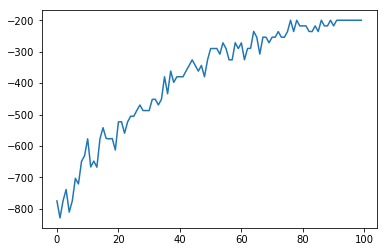

In [87]:
#main loop
for epoch in tqdm(range(n_epochs)):
    print("Epoch %s:"%epoch)
    
    crossovered = [crossover(choice(pool), choice(pool)) 
                   for _ in range(n_crossovers)]
#     <crossover random guys from pool, n_crossovers total>
    mutated = [mutation(crossovered[choice(range(len(crossovered)))]) for _ in range(n_mutations)]
#     <add several new policies at random, n_mutations total>
    assert type(crossovered) == type(mutated) == list
    
    #add new policies to the pool
    pool = pool + crossovered + mutated
#     pool = <add up old population with crossovers/mutations>
    pool_scores = [evaluate(env, policy) for policy in pool]
#     pool_scores = <evaluate all policies again>

#select pool_size best policies
    selected_indices = np.argsort(pool_scores)[-pool_size:]
    pool = [pool[i] for i in selected_indices]
    pool_scores = [pool_scores[i] for i in selected_indices]

    #print the best policy so far (last in ascending score order)
    print("best score:", pool_scores[-1])
    epoch_scores.append(pool_scores[-1])

plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]
s = env.reset()
total_reward = 0
step_num = 0
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1 
file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                              "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                           ignore_index=True )
file.head()
file.to_csv("results.csv")

#### Видно, что такси понимает, что если ему стоять на месте или просто ходить, не подбирая пассажира, то оно получит наибольшую награду, так что придётся поменять систему, по которой такси плучает награду

In [1]:
from taxi_upgraded import TaxiEnvUpgr

In [2]:
env = TaxiEnvUpgr()

In [3]:
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

None


In [4]:
import numpy as np
n_states = env.observation_space.n
n_actions = env.action_space.n
def get_random_policy():
    """
    Build a numpy array representing agent policy.
    This array must have one element per each of 16 environment states.
    Element must be an integer from 0 to 3, representing action
    to take from that state.
    """
    return np.random.randint(0, n_actions, n_states)

In [5]:
def sample_reward(env, policy, t_max=100):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    state = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[state]
        state, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [6]:
def evaluate(env, policy, n_times=20, t_max=100):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy, t_max))
    return float(np.mean(np.array(rewards)))      

In [7]:
def crossover(policy1, policy2, p=0.5):
    """
    for each state, with probability p take action from policy1, else policy2
    """
    cross_policy = []
    
    return np.choose(np.random.choice(np.array([0, 1]), 
                     size = policy1.shape, 
                     p = [p, 1-p]),
                     choices=[policy1, policy2])

In [8]:
def mutation(policy, p=0.1):
    """
    for each state, with probability p replace action with random action
    Tip: mutation can be written as crossover with random policy
    """
#     <your code>
    return crossover(get_random_policy(), policy, p)
    

In [38]:
from taxi_upgraded_v2 import TaxiEnvUpgrV2

In [39]:
env = TaxiEnvUpgrV2()

In [40]:
n_epochs = 150 #how many cycles to make
pool_size = 150 #how many policies to maintain
n_crossovers = 80 #how many crossovers to make on each step
n_mutations = 80 #how many mutations to make on each tick

In [41]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


In [42]:
from tqdm import tqdm
from random import choice
best_policy = []

  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

Epoch 0:
best score: -919.29, mean score: -1025.852111111111


  1%|▌                                                                              | 1/150 [01:40<4:10:15, 100.78s/it]

Epoch 1:
best score: -919.0066666666667, mean score: -1005.3103333333332


  1%|█                                                                               | 2/150 [03:18<4:06:03, 99.75s/it]

Epoch 2:
best score: -902.6166666666667, mean score: -989.1864444444445


  2%|█▌                                                                              | 3/150 [04:53<4:01:06, 98.41s/it]

Epoch 3:
best score: -895.26, mean score: -983.8146


  3%|██▏                                                                             | 4/150 [06:28<3:56:58, 97.39s/it]

Epoch 4:
best score: -860.0366666666666, mean score: -967.9706222222221


  3%|██▋                                                                             | 5/150 [08:03<3:53:45, 96.73s/it]

Epoch 5:
best score: -858.24, mean score: -960.6708888888888


  4%|███▏                                                                            | 6/150 [09:38<3:51:05, 96.29s/it]

Epoch 6:
best score: -883.69, mean score: -955.2113999999999


  5%|███▋                                                                            | 7/150 [11:13<3:48:27, 95.85s/it]

Epoch 7:
best score: -810.2533333333333, mean score: -946.9358


  5%|████▎                                                                           | 8/150 [12:48<3:46:07, 95.54s/it]

Epoch 8:
best score: -831.2366666666667, mean score: -941.8329555555555


  6%|████▊                                                                           | 9/150 [14:24<3:44:51, 95.68s/it]

Epoch 9:
best score: -849.6033333333334, mean score: -928.2631111111111


  7%|█████▎                                                                         | 10/150 [15:59<3:42:27, 95.34s/it]

Epoch 10:
best score: -847.9366666666666, mean score: -920.8699555555554


  7%|█████▊                                                                         | 11/150 [17:34<3:40:52, 95.34s/it]

Epoch 11:
best score: -824.5333333333333, mean score: -921.1369555555556


  8%|██████▎                                                                        | 12/150 [19:12<3:41:11, 96.17s/it]

Epoch 12:
best score: -828.3533333333334, mean score: -914.1981777777779


  9%|██████▊                                                                        | 13/150 [20:58<3:46:30, 99.20s/it]

Epoch 13:
best score: -800.19, mean score: -902.6169555555556


  9%|███████▎                                                                      | 14/150 [22:46<3:50:26, 101.67s/it]

Epoch 14:
best score: -822.6933333333334, mean score: -897.5696444444444


 10%|███████▊                                                                      | 15/150 [24:32<3:51:53, 103.06s/it]

Epoch 15:
best score: -797.7533333333333, mean score: -893.7033111111109


 11%|████████▎                                                                     | 16/150 [26:16<3:50:29, 103.20s/it]

Epoch 16:
best score: -799.88, mean score: -880.5302888888889


 11%|████████▊                                                                     | 17/150 [28:03<3:51:22, 104.38s/it]

Epoch 17:
best score: -788.93, mean score: -880.4782666666666


 12%|█████████▎                                                                    | 18/150 [29:52<3:52:51, 105.85s/it]

Epoch 18:
best score: -764.0066666666667, mean score: -866.6348


 13%|█████████▉                                                                    | 19/150 [31:53<4:01:21, 110.55s/it]

Epoch 19:
best score: -776.1166666666667, mean score: -858.078


 13%|██████████▍                                                                   | 20/150 [33:31<3:51:04, 106.65s/it]

Epoch 20:
best score: -786.3566666666667, mean score: -856.4015111111111


 14%|██████████▉                                                                   | 21/150 [35:07<3:42:31, 103.50s/it]

Epoch 21:
best score: -761.53, mean score: -844.4667555555556


 15%|███████████▍                                                                  | 22/150 [36:43<3:35:49, 101.17s/it]

Epoch 22:
best score: -768.3533333333334, mean score: -843.4284666666666


 15%|████████████                                                                   | 23/150 [38:19<3:30:57, 99.66s/it]

Epoch 23:
best score: -764.67, mean score: -835.8717777777778


 16%|████████████▋                                                                  | 24/150 [39:55<3:26:50, 98.49s/it]

Epoch 24:
best score: -746.69, mean score: -825.1250666666667


 17%|█████████████▏                                                                 | 25/150 [41:30<3:23:22, 97.62s/it]

Epoch 25:
best score: -699.0966666666667, mean score: -820.8667777777778


 17%|█████████████▋                                                                 | 26/150 [43:06<3:20:14, 96.89s/it]

Epoch 26:
best score: -721.08, mean score: -814.6467555555556


 18%|██████████████▏                                                                | 27/150 [44:42<3:18:04, 96.62s/it]

Epoch 27:
best score: -711.65, mean score: -803.9733777777778


 19%|██████████████▋                                                                | 28/150 [46:17<3:15:57, 96.37s/it]

Epoch 28:
best score: -710.3133333333334, mean score: -799.1284444444444


 19%|███████████████▎                                                               | 29/150 [47:53<3:13:47, 96.10s/it]

Epoch 29:
best score: -695.2566666666667, mean score: -786.3369777777777


 20%|███████████████▊                                                               | 30/150 [49:30<3:12:45, 96.38s/it]

Epoch 30:
best score: -704.03, mean score: -782.9277111111111


 21%|████████████████▎                                                              | 31/150 [51:05<3:10:34, 96.08s/it]

Epoch 31:
best score: -699.6566666666666, mean score: -772.2446444444444


 21%|████████████████▊                                                              | 32/150 [52:41<3:08:33, 95.88s/it]

Epoch 32:
best score: -703.9833333333333, mean score: -764.1182666666666


 22%|█████████████████▍                                                             | 33/150 [54:17<3:07:03, 95.93s/it]

Epoch 33:
best score: -679.7366666666667, mean score: -755.6022222222222


 23%|█████████████████▉                                                             | 34/150 [55:52<3:05:15, 95.82s/it]

Epoch 34:
best score: -622.5333333333333, mean score: -751.1211999999999


 23%|██████████████████▍                                                            | 35/150 [57:28<3:03:35, 95.79s/it]

Epoch 35:
best score: -680.5266666666666, mean score: -745.7244888888889


 24%|██████████████████▉                                                            | 36/150 [59:03<3:01:31, 95.54s/it]

Epoch 36:
best score: -645.8, mean score: -741.753088888889


 25%|██████████████████▉                                                          | 37/150 [1:00:39<3:00:08, 95.65s/it]

Epoch 37:
best score: -631.4733333333334, mean score: -731.1454888888888


 25%|███████████████████▌                                                         | 38/150 [1:02:15<2:58:36, 95.69s/it]

Epoch 38:
best score: -623.3133333333334, mean score: -721.8164888888889


 26%|████████████████████                                                         | 39/150 [1:03:50<2:56:41, 95.51s/it]

Epoch 39:
best score: -653.4933333333333, mean score: -716.6780666666666


 27%|████████████████████▌                                                        | 40/150 [1:05:26<2:55:36, 95.79s/it]

Epoch 40:
best score: -598.2533333333333, mean score: -710.6942


 27%|█████████████████████                                                        | 41/150 [1:07:01<2:53:40, 95.60s/it]

Epoch 41:
best score: -620.5866666666667, mean score: -702.3732222222222


 28%|█████████████████████▌                                                       | 42/150 [1:08:37<2:51:56, 95.53s/it]

Epoch 42:
best score: -604.1633333333333, mean score: -692.3750888888889


 29%|██████████████████████                                                       | 43/150 [1:10:13<2:50:39, 95.70s/it]

Epoch 43:
best score: -615.8933333333333, mean score: -690.5213333333334


 29%|██████████████████████▌                                                      | 44/150 [1:11:48<2:49:00, 95.67s/it]

Epoch 44:
best score: -599.1833333333333, mean score: -677.6558444444445


 30%|███████████████████████                                                      | 45/150 [1:13:24<2:47:15, 95.58s/it]

Epoch 45:
best score: -591.0033333333333, mean score: -674.4055333333333


 31%|███████████████████████▌                                                     | 46/150 [1:15:00<2:45:47, 95.65s/it]

Epoch 46:
best score: -602.1366666666667, mean score: -669.7643555555555


 31%|████████████████████████▏                                                    | 47/150 [1:16:36<2:44:22, 95.75s/it]

Epoch 47:
best score: -586.4833333333333, mean score: -662.1238666666666


 32%|████████████████████████▋                                                    | 48/150 [1:18:11<2:42:29, 95.58s/it]

Epoch 48:
best score: -589.95, mean score: -657.9284666666666


 33%|█████████████████████████▏                                                   | 49/150 [1:19:46<2:40:55, 95.60s/it]

Epoch 49:
best score: -583.8466666666667, mean score: -649.4125111111111


 33%|█████████████████████████▋                                                   | 50/150 [1:21:23<2:39:36, 95.76s/it]

Epoch 50:
best score: -548.54, mean score: -641.8540666666665


 34%|██████████████████████████▏                                                  | 51/150 [1:22:59<2:38:32, 96.09s/it]

Epoch 51:
best score: -553.47, mean score: -634.1676888888888


 35%|██████████████████████████▋                                                  | 52/150 [1:24:36<2:37:02, 96.15s/it]

Epoch 52:
best score: -574.1433333333333, mean score: -633.4053333333333


 35%|███████████████████████████▏                                                 | 53/150 [1:26:10<2:34:45, 95.73s/it]

Epoch 53:
best score: -563.3, mean score: -623.0756444444445


 36%|███████████████████████████▋                                                 | 54/150 [1:27:47<2:33:25, 95.89s/it]

Epoch 54:
best score: -544.0833333333334, mean score: -613.5108


 37%|████████████████████████████▏                                                | 55/150 [1:29:22<2:31:44, 95.84s/it]

Epoch 55:
best score: -532.8666666666667, mean score: -605.9036444444445


 37%|████████████████████████████▋                                                | 56/150 [1:30:58<2:29:50, 95.64s/it]

Epoch 56:
best score: -541.99, mean score: -600.4393777777777


 38%|█████████████████████████████▎                                               | 57/150 [1:32:33<2:28:16, 95.66s/it]

Epoch 57:
best score: -534.1133333333333, mean score: -593.1480444444445


 39%|█████████████████████████████▊                                               | 58/150 [1:34:09<2:26:33, 95.59s/it]

Epoch 58:
best score: -539.05, mean score: -591.0430888888889


 39%|██████████████████████████████▎                                              | 59/150 [1:35:45<2:25:19, 95.82s/it]

Epoch 59:
best score: -527.9066666666666, mean score: -588.0326888888889


 40%|██████████████████████████████▊                                              | 60/150 [1:37:22<2:24:06, 96.07s/it]

Epoch 60:
best score: -514.6433333333333, mean score: -579.3944222222221


 41%|███████████████████████████████▎                                             | 61/150 [1:38:58<2:22:30, 96.07s/it]

Epoch 61:
best score: -514.26, mean score: -573.5214


 41%|███████████████████████████████▊                                             | 62/150 [1:40:34<2:20:46, 95.98s/it]

Epoch 62:
best score: -524.12, mean score: -571.5600888888889


 42%|████████████████████████████████▎                                            | 63/150 [1:42:10<2:19:16, 96.06s/it]

Epoch 63:
best score: -508.25333333333333, mean score: -566.2535333333333


 43%|████████████████████████████████▊                                            | 64/150 [1:43:45<2:17:26, 95.89s/it]

Epoch 64:
best score: -515.6866666666666, mean score: -563.0398666666666


 43%|█████████████████████████████████▎                                           | 65/150 [1:45:21<2:15:48, 95.87s/it]

Epoch 65:
best score: -508.9066666666667, mean score: -560.6241111111111


 44%|█████████████████████████████████▉                                           | 66/150 [1:46:57<2:14:02, 95.74s/it]

Epoch 66:
best score: -479.0133333333333, mean score: -552.2941777777778


 45%|██████████████████████████████████▍                                          | 67/150 [1:48:33<2:12:50, 96.02s/it]

Epoch 67:
best score: -503.84, mean score: -549.8944666666667


 45%|██████████████████████████████████▉                                          | 68/150 [1:50:10<2:11:22, 96.12s/it]

Epoch 68:
best score: -487.5566666666667, mean score: -544.931911111111


 46%|███████████████████████████████████▍                                         | 69/150 [1:51:45<2:09:33, 95.97s/it]

Epoch 69:
best score: -497.1, mean score: -540.5103555555556


 47%|███████████████████████████████████▉                                         | 70/150 [1:53:21<2:07:47, 95.85s/it]

Epoch 70:
best score: -485.41, mean score: -535.8610000000001


 47%|████████████████████████████████████▍                                        | 71/150 [1:54:57<2:06:12, 95.86s/it]

Epoch 71:
best score: -486.06, mean score: -531.2724


 48%|████████████████████████████████████▉                                        | 72/150 [1:56:32<2:04:17, 95.61s/it]

Epoch 72:
best score: -454.66333333333336, mean score: -529.3234444444444


 49%|█████████████████████████████████████▍                                       | 73/150 [1:58:08<2:02:48, 95.69s/it]

Epoch 73:
best score: -476.72333333333336, mean score: -523.7584666666665


 49%|█████████████████████████████████████▉                                       | 74/150 [1:59:44<2:01:24, 95.85s/it]

Epoch 74:
best score: -452.03333333333336, mean score: -519.651


 50%|██████████████████████████████████████▌                                      | 75/150 [2:01:19<1:59:33, 95.65s/it]

Epoch 75:
best score: -484.61, mean score: -518.5604


 51%|███████████████████████████████████████                                      | 76/150 [2:02:54<1:57:53, 95.59s/it]

Epoch 76:
best score: -454.8833333333333, mean score: -510.73246666666665


 51%|███████████████████████████████████████▌                                     | 77/150 [2:04:30<1:56:17, 95.58s/it]

Epoch 77:
best score: -455.55, mean score: -507.6984666666666


 52%|████████████████████████████████████████                                     | 78/150 [2:06:06<1:54:48, 95.68s/it]

Epoch 78:
best score: -440.06666666666666, mean score: -501.35842222222226


 53%|████████████████████████████████████████▌                                    | 79/150 [2:07:42<1:53:13, 95.68s/it]

Epoch 79:
best score: -449.28333333333336, mean score: -500.82782222222215


 53%|█████████████████████████████████████████                                    | 80/150 [2:09:18<1:52:03, 96.05s/it]

Epoch 80:
best score: -439.51666666666665, mean score: -494.2857555555556


 54%|█████████████████████████████████████████▌                                   | 81/150 [2:10:54<1:50:12, 95.84s/it]

Epoch 81:
best score: -445.36, mean score: -489.82466666666676


 55%|██████████████████████████████████████████                                   | 82/150 [2:12:30<1:48:35, 95.81s/it]

Epoch 82:
best score: -437.4166666666667, mean score: -486.40782222222225


 55%|██████████████████████████████████████████▌                                  | 83/150 [2:14:05<1:46:54, 95.74s/it]

Epoch 83:
best score: -447.8, mean score: -482.2926666666667


 56%|███████████████████████████████████████████                                  | 84/150 [2:15:40<1:45:02, 95.49s/it]

Epoch 84:
best score: -438.72, mean score: -479.7916666666667


 57%|███████████████████████████████████████████▋                                 | 85/150 [2:17:15<1:43:24, 95.45s/it]

Epoch 85:
best score: -421.12333333333333, mean score: -476.24137777777776


 57%|████████████████████████████████████████████▏                                | 86/150 [2:18:52<1:42:05, 95.71s/it]

Epoch 86:
best score: -424.71, mean score: -475.56428888888894


 58%|████████████████████████████████████████████▋                                | 87/150 [2:20:40<1:44:34, 99.59s/it]

Epoch 87:
best score: -423.7, mean score: -470.371


 59%|████████████████████████████████████████████▌                               | 88/150 [2:22:24<1:44:06, 100.75s/it]

Epoch 88:
best score: -425.59, mean score: -471.0924222222223


 59%|█████████████████████████████████████████████▋                               | 89/150 [2:24:00<1:41:00, 99.35s/it]

Epoch 89:
best score: -426.0366666666667, mean score: -464.9033111111112


 60%|██████████████████████████████████████████████▏                              | 90/150 [2:25:36<1:38:18, 98.31s/it]

Epoch 90:
best score: -425.35, mean score: -463.31744444444445


 61%|██████████████████████████████████████████████▋                              | 91/150 [2:27:11<1:35:49, 97.45s/it]

Epoch 91:
best score: -424.30333333333334, mean score: -462.8114444444445


 61%|███████████████████████████████████████████████▏                             | 92/150 [2:28:47<1:33:35, 96.82s/it]

Epoch 92:
best score: -413.62666666666667, mean score: -458.9349111111111


 62%|███████████████████████████████████████████████▋                             | 93/150 [2:30:24<1:32:08, 96.98s/it]

Epoch 93:
best score: -416.80333333333334, mean score: -455.50426666666664


 63%|███████████████████████████████████████████████▋                            | 94/150 [2:32:12<1:33:34, 100.26s/it]

Epoch 94:
best score: -409.2866666666667, mean score: -450.9684666666666


 63%|████████████████████████████████████████████████▊                            | 95/150 [2:33:48<1:30:44, 98.98s/it]

Epoch 95:
best score: -417.69666666666666, mean score: -450.5152666666666


 64%|█████████████████████████████████████████████████▎                           | 96/150 [2:35:24<1:28:21, 98.18s/it]

Epoch 96:
best score: -403.58666666666664, mean score: -447.8720444444445


 65%|█████████████████████████████████████████████████▊                           | 97/150 [2:37:00<1:26:01, 97.39s/it]

Epoch 97:
best score: -397.07666666666665, mean score: -443.79628888888885


 65%|██████████████████████████████████████████████████▎                          | 98/150 [2:38:36<1:24:00, 96.93s/it]

Epoch 98:
best score: -401.92, mean score: -441.33666666666664


 66%|██████████████████████████████████████████████████▊                          | 99/150 [2:40:12<1:22:10, 96.68s/it]

Epoch 99:
best score: -377.19666666666666, mean score: -436.71688888888883


 67%|██████████████████████████████████████████████████▋                         | 100/150 [2:41:47<1:20:12, 96.25s/it]

Epoch 100:
best score: -368.17, mean score: -434.42948888888895


 67%|███████████████████████████████████████████████████▏                        | 101/150 [2:43:22<1:18:17, 95.87s/it]

Epoch 101:
best score: -376.7633333333333, mean score: -430.0822888888889


 68%|███████████████████████████████████████████████████▋                        | 102/150 [2:44:57<1:16:36, 95.76s/it]

Epoch 102:
best score: -379.69666666666666, mean score: -427.9841333333333


 69%|████████████████████████████████████████████████████▏                       | 103/150 [2:46:33<1:14:52, 95.59s/it]

Epoch 103:
best score: -376.1433333333333, mean score: -423.4655555555556


 69%|████████████████████████████████████████████████████▋                       | 104/150 [2:48:08<1:13:19, 95.65s/it]

Epoch 104:
best score: -368.01666666666665, mean score: -419.64157777777774


 70%|█████████████████████████████████████████████████████▏                      | 105/150 [2:49:44<1:11:49, 95.77s/it]

Epoch 105:
best score: -380.8466666666667, mean score: -419.4378666666667


 71%|█████████████████████████████████████████████████████▋                      | 106/150 [2:51:21<1:10:18, 95.88s/it]

Epoch 106:
best score: -363.7, mean score: -415.0519111111111


 71%|██████████████████████████████████████████████████████▏                     | 107/150 [2:52:56<1:08:34, 95.69s/it]

Epoch 107:
best score: -366.36333333333334, mean score: -413.20966666666664


 72%|██████████████████████████████████████████████████████▋                     | 108/150 [2:54:32<1:07:00, 95.73s/it]

Epoch 108:
best score: -368.35333333333335, mean score: -407.3870222222222


 73%|███████████████████████████████████████████████████████▏                    | 109/150 [2:56:07<1:05:23, 95.70s/it]

Epoch 109:
best score: -368.52, mean score: -405.17420000000004


 73%|███████████████████████████████████████████████████████▋                    | 110/150 [2:57:43<1:03:52, 95.82s/it]

Epoch 110:
best score: -354.09, mean score: -400.9649111111111


 74%|████████████████████████████████████████████████████████▏                   | 111/150 [2:59:19<1:02:18, 95.86s/it]

Epoch 111:
best score: -364.68, mean score: -398.88026666666667


 75%|████████████████████████████████████████████████████████▋                   | 112/150 [3:00:56<1:00:47, 95.99s/it]

Epoch 112:
best score: -355.41, mean score: -395.70391111111104


 75%|██████████████████████████████████████████████████████████▊                   | 113/150 [3:02:32<59:10, 95.97s/it]

Epoch 113:
best score: -344.9166666666667, mean score: -389.4542222222222


 76%|███████████████████████████████████████████████████████████▎                  | 114/150 [3:04:07<57:32, 95.90s/it]

Epoch 114:
best score: -342.94666666666666, mean score: -388.14595555555553


 77%|███████████████████████████████████████████████████████████▊                  | 115/150 [3:05:43<55:56, 95.90s/it]

Epoch 115:
best score: -341.81666666666666, mean score: -386.81688888888885


 77%|████████████████████████████████████████████████████████████▎                 | 116/150 [3:07:19<54:23, 95.99s/it]

Epoch 116:
best score: -347.99333333333334, mean score: -384.2429333333333


 78%|████████████████████████████████████████████████████████████▊                 | 117/150 [3:08:55<52:46, 95.95s/it]

Epoch 117:
best score: -350.96, mean score: -380.9428222222223


 79%|█████████████████████████████████████████████████████████████▎                | 118/150 [3:10:31<51:12, 96.01s/it]

Epoch 118:
best score: -334.77666666666664, mean score: -380.8082222222222


 79%|█████████████████████████████████████████████████████████████▉                | 119/150 [3:12:07<49:34, 95.96s/it]

Epoch 119:
best score: -342.3566666666667, mean score: -378.3615777777778


 80%|██████████████████████████████████████████████████████████████▍               | 120/150 [3:13:43<47:59, 95.99s/it]

Epoch 120:
best score: -325.5466666666667, mean score: -374.3641555555555


 81%|██████████████████████████████████████████████████████████████▉               | 121/150 [3:15:19<46:19, 95.84s/it]

Epoch 121:
best score: -334.8433333333333, mean score: -373.7319333333334


 81%|███████████████████████████████████████████████████████████████▍              | 122/150 [3:16:54<44:36, 95.60s/it]

Epoch 122:
best score: -324.7633333333333, mean score: -370.90975555555553


 82%|███████████████████████████████████████████████████████████████▉              | 123/150 [3:18:29<42:56, 95.43s/it]

Epoch 123:
best score: -334.51666666666665, mean score: -369.51506666666666


 83%|████████████████████████████████████████████████████████████████▍             | 124/150 [3:20:06<41:35, 95.99s/it]

Epoch 124:
best score: -328.67, mean score: -366.1837777777778


 83%|█████████████████████████████████████████████████████████████████             | 125/150 [3:21:42<39:59, 95.97s/it]

Epoch 125:
best score: -331.19, mean score: -364.57373333333334


 84%|█████████████████████████████████████████████████████████████████▌            | 126/150 [3:23:18<38:20, 95.85s/it]

Epoch 126:
best score: -329.8, mean score: -360.9138888888889


 85%|██████████████████████████████████████████████████████████████████            | 127/150 [3:24:53<36:43, 95.79s/it]

Epoch 127:
best score: -312.80333333333334, mean score: -359.1802888888888


 85%|██████████████████████████████████████████████████████████████████▌           | 128/150 [3:26:29<35:04, 95.66s/it]

Epoch 128:
best score: -323.52, mean score: -359.4938666666667


 86%|███████████████████████████████████████████████████████████████████           | 129/150 [3:28:05<33:30, 95.74s/it]

Epoch 129:
best score: -329.36, mean score: -357.0168444444445


 87%|███████████████████████████████████████████████████████████████████▌          | 130/150 [3:29:41<31:55, 95.80s/it]

Epoch 130:
best score: -314.35, mean score: -353.19608888888894


 87%|████████████████████████████████████████████████████████████████████          | 131/150 [3:31:16<30:17, 95.68s/it]

Epoch 131:
best score: -322.1666666666667, mean score: -351.16137777777783


 88%|████████████████████████████████████████████████████████████████████▋         | 132/150 [3:32:51<28:40, 95.57s/it]

Epoch 132:
best score: -317.2966666666667, mean score: -350.6152666666666


 89%|█████████████████████████████████████████████████████████████████████▏        | 133/150 [3:34:27<27:05, 95.62s/it]

Epoch 133:
best score: -318.9, mean score: -349.8418666666667


 89%|█████████████████████████████████████████████████████████████████████▋        | 134/150 [3:36:02<25:26, 95.39s/it]

Epoch 134:
best score: -314.53, mean score: -347.4134888888889


 90%|██████████████████████████████████████████████████████████████████████▏       | 135/150 [3:37:38<23:52, 95.53s/it]

Epoch 135:
best score: -319.22, mean score: -347.7809555555556


 91%|██████████████████████████████████████████████████████████████████████▋       | 136/150 [3:39:14<22:20, 95.73s/it]

Epoch 136:
best score: -315.33, mean score: -346.94835555555557


 91%|███████████████████████████████████████████████████████████████████████▏      | 137/150 [3:40:49<20:43, 95.67s/it]

Epoch 137:
best score: -304.2366666666667, mean score: -345.41928888888896


 92%|███████████████████████████████████████████████████████████████████████▊      | 138/150 [3:42:25<19:09, 95.75s/it]

Epoch 138:
best score: -309.33, mean score: -345.07397777777777


 93%|████████████████████████████████████████████████████████████████████████▎     | 139/150 [3:44:02<17:35, 95.99s/it]

Epoch 139:
best score: -301.1566666666667, mean score: -342.45377777777776


 93%|████████████████████████████████████████████████████████████████████████▊     | 140/150 [3:45:39<16:02, 96.26s/it]

Epoch 140:
best score: -308.04, mean score: -343.0217333333334


 94%|█████████████████████████████████████████████████████████████████████████▎    | 141/150 [3:47:14<14:24, 96.09s/it]

Epoch 141:
best score: -300.9633333333333, mean score: -339.3595777777778


 95%|█████████████████████████████████████████████████████████████████████████▊    | 142/150 [3:48:50<12:47, 95.99s/it]

Epoch 142:
best score: -301.78, mean score: -338.4796222222222


 95%|██████████████████████████████████████████████████████████████████████████▎   | 143/150 [3:50:27<11:13, 96.15s/it]

Epoch 143:
best score: -310.52, mean score: -338.6492222222222


 96%|██████████████████████████████████████████████████████████████████████████▉   | 144/150 [3:52:03<09:36, 96.06s/it]

Epoch 144:
best score: -298.14666666666665, mean score: -336.87668888888896


 97%|███████████████████████████████████████████████████████████████████████████▍  | 145/150 [3:53:40<08:02, 96.41s/it]

Epoch 145:
best score: -290.78333333333336, mean score: -335.12971111111113


 97%|███████████████████████████████████████████████████████████████████████████▉  | 146/150 [3:55:16<06:25, 96.38s/it]

Epoch 146:
best score: -308.8066666666667, mean score: -335.01466666666664


 98%|████████████████████████████████████████████████████████████████████████████▍ | 147/150 [3:56:52<04:48, 96.09s/it]

Epoch 147:
best score: -302.1333333333333, mean score: -333.16544444444446


 99%|████████████████████████████████████████████████████████████████████████████▉ | 148/150 [3:58:27<03:11, 95.82s/it]

Epoch 148:
best score: -301.51666666666665, mean score: -331.3638


 99%|█████████████████████████████████████████████████████████████████████████████▍| 149/150 [4:00:03<01:36, 96.00s/it]

Epoch 149:
best score: -299.43333333333334, mean score: -332.3190444444445


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [4:01:39<00:00, 95.81s/it]


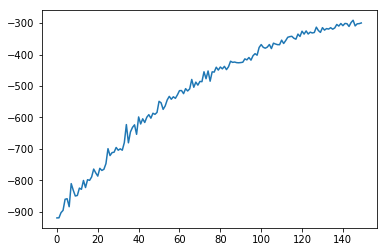

0  False  -6  400
1  False  -1  400
2  False  -6  400
3  False  -5  400
4  False  -1  400
5  False  -1  400
6  False  -5  400
7  False  -2  400
8  False  -1  400
9  False  -1  400
10  False  -1  400
11  False  -4  400
12  False  -3  400
13  False  -5  400
14  False  -4  400
15  False  -1  400
16  False  -1  400
17  False  -7  400
18  False  -1  400
19  False  -2  400
20  False  -8  400
21  False  -5  400
22  False  -2  400
23  False  -7  400
24  False  -5  400
25  False  -1  400
26  False  -5  400
27  False  -5  400
28  False  -6  400
29  False  -5  400
30  False  -1  400
31  False  -1  400
32  False  -5  400
33  False  -1  400
34  False  -1  400
35  False  -5  400
36  False  -8  400
37  False  -5  400
38  False  -8  400
39  False  -5  400
40  False  -4  400
41  False  -9  400
42  False  -2  400
43  False  -1  400
44  False  -2  400
45  False  -1  400
46  False  -4  400
47  False  -5  400
48  False  -1  400
49  False  -1  400


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

Epoch 0:
best score: -932.1275, mean score: -1027.2578833333334


  1%|▌                                                                              | 1/150 [02:07<5:17:18, 127.77s/it]

Epoch 1:
best score: -937.3175, mean score: -1012.5709166666666


  1%|█                                                                              | 2/150 [04:16<5:15:35, 127.95s/it]

Epoch 2:
best score: -911.5675, mean score: -991.8378500000001


  2%|█▌                                                                             | 3/150 [06:24<5:13:50, 128.10s/it]

Epoch 3:
best score: -894.7725, mean score: -979.5978333333333


  3%|██                                                                             | 4/150 [08:33<5:12:25, 128.39s/it]

Epoch 4:
best score: -875.2625, mean score: -968.0318166666666


  3%|██▋                                                                            | 5/150 [10:42<5:10:15, 128.38s/it]

Epoch 5:
best score: -848.455, mean score: -958.5055333333335


  4%|███▏                                                                           | 6/150 [12:50<5:08:29, 128.54s/it]

Epoch 6:
best score: -840.0, mean score: -951.910033333333


  5%|███▋                                                                           | 7/150 [14:59<5:06:39, 128.66s/it]

Epoch 7:
best score: -870.2825, mean score: -941.1314833333333


  5%|████▏                                                                          | 8/150 [17:07<5:03:36, 128.29s/it]

Epoch 8:
best score: -817.46, mean score: -926.8078666666667


  6%|████▋                                                                          | 9/150 [19:16<5:01:49, 128.43s/it]

Epoch 9:
best score: -827.425, mean score: -920.6443833333334


  7%|█████▏                                                                        | 10/150 [21:25<5:00:19, 128.71s/it]

Epoch 10:
best score: -822.4525, mean score: -911.1060333333331


  7%|█████▋                                                                        | 11/150 [23:33<4:58:01, 128.64s/it]

Epoch 11:
best score: -830.2225, mean score: -905.5566333333333


  8%|██████▏                                                                       | 12/150 [25:42<4:55:38, 128.54s/it]

Epoch 12:
best score: -798.22, mean score: -898.0105666666668


  9%|██████▊                                                                       | 13/150 [27:52<4:54:22, 128.93s/it]

Epoch 13:
best score: -811.6425, mean score: -890.1035499999998


  9%|███████▎                                                                      | 14/150 [30:00<4:52:09, 128.90s/it]

Epoch 14:
best score: -777.4275, mean score: -879.4190666666666


 10%|███████▊                                                                      | 15/150 [32:09<4:49:56, 128.86s/it]

Epoch 15:
best score: -789.0575, mean score: -875.3477


 11%|████████▎                                                                     | 16/150 [34:18<4:47:29, 128.72s/it]

Epoch 16:
best score: -774.525, mean score: -866.3327166666667


 11%|████████▊                                                                     | 17/150 [36:26<4:45:01, 128.59s/it]

Epoch 17:
best score: -790.0425, mean score: -857.4200333333333


 12%|█████████▎                                                                    | 18/150 [38:34<4:42:41, 128.50s/it]

Epoch 18:
best score: -771.4475, mean score: -853.2743666666667


 13%|█████████▉                                                                    | 19/150 [40:42<4:40:27, 128.46s/it]

Epoch 19:
best score: -764.9025, mean score: -844.4850833333333


 13%|██████████▍                                                                   | 20/150 [42:52<4:38:47, 128.67s/it]

Epoch 20:
best score: -737.7575, mean score: -832.3263666666666


 14%|██████████▉                                                                   | 21/150 [45:00<4:36:30, 128.61s/it]

Epoch 21:
best score: -722.99, mean score: -825.5616333333334


 15%|███████████▍                                                                  | 22/150 [47:08<4:33:52, 128.38s/it]

Epoch 22:
best score: -747.14, mean score: -816.0279333333333


 15%|███████████▉                                                                  | 23/150 [49:17<4:32:17, 128.64s/it]

Epoch 23:
best score: -727.9725, mean score: -814.2148333333333


 16%|████████████▍                                                                 | 24/150 [51:26<4:30:07, 128.63s/it]

Epoch 24:
best score: -715.36, mean score: -810.78865


 17%|█████████████                                                                 | 25/150 [53:35<4:28:09, 128.71s/it]

Epoch 25:
best score: -737.9225, mean score: -796.79605


 17%|█████████████▌                                                                | 26/150 [55:44<4:26:15, 128.84s/it]

Epoch 26:
best score: -731.725, mean score: -792.5824666666666


 18%|██████████████                                                                | 27/150 [57:53<4:24:05, 128.83s/it]

Epoch 27:
best score: -683.1975, mean score: -784.7792333333334


 19%|██████████████▏                                                             | 28/150 [1:00:01<4:21:51, 128.78s/it]

Epoch 28:
best score: -709.115, mean score: -776.605


 19%|██████████████▋                                                             | 29/150 [1:02:09<4:19:20, 128.60s/it]

Epoch 29:
best score: -708.88, mean score: -773.5179666666667


 20%|███████████████▏                                                            | 30/150 [1:04:19<4:17:48, 128.90s/it]

Epoch 30:
best score: -705.4025, mean score: -765.4121


 21%|███████████████▋                                                            | 31/150 [1:06:28<4:15:31, 128.84s/it]

Epoch 31:
best score: -678.2725, mean score: -759.5043666666667


 21%|████████████████▏                                                           | 32/150 [1:08:36<4:13:07, 128.71s/it]

Epoch 32:
best score: -672.3525, mean score: -749.4823333333334


 22%|████████████████▋                                                           | 33/150 [1:10:45<4:10:59, 128.71s/it]

Epoch 33:
best score: -660.7875, mean score: -743.1383500000001


 23%|█████████████████▏                                                          | 34/150 [1:12:56<4:09:58, 129.29s/it]

Epoch 34:
best score: -654.1975, mean score: -731.52535


 23%|█████████████████▋                                                          | 35/150 [1:15:05<4:07:42, 129.24s/it]

Epoch 35:
best score: -654.4175, mean score: -723.9977


 24%|██████████████████▏                                                         | 36/150 [1:17:16<4:06:50, 129.92s/it]

Epoch 36:
best score: -632.79, mean score: -717.6224166666666


 25%|██████████████████▋                                                         | 37/150 [1:19:28<4:05:32, 130.38s/it]

Epoch 37:
best score: -641.6025, mean score: -705.03855


 25%|███████████████████▎                                                        | 38/150 [1:21:38<4:03:21, 130.37s/it]

Epoch 38:
best score: -626.39, mean score: -702.32795


 26%|███████████████████▊                                                        | 39/150 [1:23:49<4:01:46, 130.69s/it]

Epoch 39:
best score: -617.595, mean score: -693.38715


 27%|████████████████████▎                                                       | 40/150 [1:25:59<3:59:11, 130.47s/it]

Epoch 40:
best score: -608.27, mean score: -685.4316666666666


 27%|████████████████████▊                                                       | 41/150 [1:28:10<3:57:08, 130.53s/it]

Epoch 41:
best score: -610.225, mean score: -681.63385


 28%|█████████████████████▎                                                      | 42/150 [1:30:19<3:54:09, 130.09s/it]

Epoch 42:
best score: -604.495, mean score: -673.0371166666667


 29%|█████████████████████▊                                                      | 43/150 [1:32:29<3:51:59, 130.09s/it]

Epoch 43:
best score: -601.485, mean score: -667.0293833333334


 29%|██████████████████████▎                                                     | 44/150 [1:34:38<3:49:21, 129.83s/it]

Epoch 44:
best score: -603.5775, mean score: -659.8178666666666


 30%|██████████████████████▊                                                     | 45/150 [1:36:50<3:48:00, 130.29s/it]

Epoch 45:
best score: -599.455, mean score: -657.2544666666668


 31%|███████████████████████▎                                                    | 46/150 [1:38:59<3:45:24, 130.04s/it]

Epoch 46:
best score: -576.605, mean score: -647.8143333333334


 31%|███████████████████████▊                                                    | 47/150 [1:41:08<3:42:28, 129.60s/it]

Epoch 47:
best score: -584.08, mean score: -646.6628000000001


 32%|████████████████████████▎                                                   | 48/150 [1:43:18<3:40:27, 129.69s/it]

Epoch 48:
best score: -565.9175, mean score: -640.1400833333335


 33%|████████████████████████▊                                                   | 49/150 [1:45:29<3:39:01, 130.11s/it]

Epoch 49:
best score: -571.235, mean score: -635.0756333333334


 33%|█████████████████████████▎                                                  | 50/150 [1:47:37<3:36:08, 129.69s/it]

Epoch 50:
best score: -580.4175, mean score: -629.7360000000001


 34%|█████████████████████████▊                                                  | 51/150 [1:49:46<3:33:21, 129.31s/it]

Epoch 51:
best score: -570.2175, mean score: -623.2377333333334


 35%|██████████████████████████▎                                                 | 52/150 [1:51:56<3:31:46, 129.66s/it]

Epoch 52:
best score: -569.295, mean score: -617.3979999999999


 35%|██████████████████████████▊                                                 | 53/150 [1:54:06<3:29:40, 129.69s/it]

Epoch 53:
best score: -561.205, mean score: -612.9813666666668


 36%|███████████████████████████▎                                                | 54/150 [1:56:14<3:26:44, 129.21s/it]

Epoch 54:
best score: -547.0225, mean score: -603.15935


 37%|███████████████████████████▊                                                | 55/150 [1:58:24<3:24:56, 129.43s/it]

Epoch 55:
best score: -537.815, mean score: -601.4322333333333


 37%|████████████████████████████▎                                               | 56/150 [2:00:33<3:22:39, 129.35s/it]

Epoch 56:
best score: -552.1925, mean score: -597.5379666666668


 38%|████████████████████████████▉                                               | 57/150 [2:02:43<3:20:25, 129.31s/it]

Epoch 57:
best score: -517.65, mean score: -589.6300833333335


 39%|█████████████████████████████▍                                              | 58/150 [2:04:53<3:18:54, 129.73s/it]

Epoch 58:
best score: -530.195, mean score: -584.61375


 39%|█████████████████████████████▉                                              | 59/150 [2:07:04<3:17:04, 129.94s/it]

Epoch 59:
best score: -531.22, mean score: -580.7596833333333


 40%|██████████████████████████████▍                                             | 60/150 [2:09:13<3:14:37, 129.75s/it]

Epoch 60:
best score: -530.05, mean score: -575.9233166666668


 41%|██████████████████████████████▉                                             | 61/150 [2:11:22<3:11:59, 129.44s/it]

Epoch 61:
best score: -532.085, mean score: -573.26935


 41%|███████████████████████████████▍                                            | 62/150 [2:13:32<3:10:20, 129.78s/it]

Epoch 62:
best score: -519.5225, mean score: -566.4326333333332


 42%|███████████████████████████████▉                                            | 63/150 [2:15:43<3:08:21, 129.90s/it]

Epoch 63:
best score: -513.4575, mean score: -562.9037666666667


 43%|████████████████████████████████▍                                           | 64/150 [2:17:52<3:05:50, 129.66s/it]

Epoch 64:
best score: -527.36, mean score: -559.0979166666667


 43%|████████████████████████████████▉                                           | 65/150 [2:20:01<3:03:27, 129.50s/it]

Epoch 65:
best score: -509.855, mean score: -553.2237


 44%|█████████████████████████████████▍                                          | 66/150 [2:22:10<3:01:16, 129.48s/it]

Epoch 66:
best score: -493.5125, mean score: -549.4744166666666


 45%|█████████████████████████████████▉                                          | 67/150 [2:24:20<2:59:24, 129.70s/it]

Epoch 67:
best score: -488.06, mean score: -545.2595999999999


 45%|██████████████████████████████████▍                                         | 68/150 [2:26:31<2:57:43, 130.04s/it]

Epoch 68:
best score: -476.015, mean score: -540.5616833333333


 46%|██████████████████████████████████▉                                         | 69/150 [2:28:43<2:56:04, 130.43s/it]

Epoch 69:
best score: -484.025, mean score: -537.3527166666667


 47%|███████████████████████████████████▍                                        | 70/150 [2:30:53<2:53:58, 130.49s/it]

Epoch 70:
best score: -469.3075, mean score: -533.9432166666668


 47%|███████████████████████████████████▉                                        | 71/150 [2:33:03<2:51:27, 130.22s/it]

Epoch 71:
best score: -472.9225, mean score: -530.0198333333334


 48%|████████████████████████████████████▍                                       | 72/150 [2:35:12<2:48:47, 129.84s/it]

Epoch 72:
best score: -464.4575, mean score: -526.0231166666666


 49%|████████████████████████████████████▉                                       | 73/150 [2:37:21<2:46:27, 129.70s/it]

Epoch 73:
best score: -476.42, mean score: -520.5807333333332


 49%|█████████████████████████████████████▍                                      | 74/150 [2:39:30<2:44:02, 129.50s/it]

Epoch 74:
best score: -474.4925, mean score: -518.9586333333334


 50%|██████████████████████████████████████                                      | 75/150 [2:41:38<2:41:16, 129.02s/it]

Epoch 75:
best score: -448.6475, mean score: -514.74055


 51%|██████████████████████████████████████▌                                     | 76/150 [2:43:46<2:38:37, 128.61s/it]

Epoch 76:
best score: -462.48, mean score: -513.0592666666668


 51%|███████████████████████████████████████                                     | 77/150 [2:45:53<2:36:07, 128.32s/it]

Epoch 77:
best score: -456.05, mean score: -506.87389999999994


 52%|███████████████████████████████████████▌                                    | 78/150 [2:48:02<2:34:02, 128.36s/it]

Epoch 78:
best score: -458.835, mean score: -503.76829999999995


 53%|████████████████████████████████████████                                    | 79/150 [2:50:10<2:31:51, 128.32s/it]

Epoch 79:
best score: -437.58, mean score: -493.5847166666666


 53%|████████████████████████████████████████▌                                   | 80/150 [2:52:20<2:30:11, 128.73s/it]

Epoch 80:


KeyboardInterrupt: 

In [43]:
for step_num in [300, 400]:
    pool = [get_random_policy() for _ in range(pool_size)]
    pool_scores = [sample_reward(env, policy) for policy in pool]
    epoch_scores = []
    for epoch in tqdm(range(n_epochs)):
        print("Epoch %s:"%epoch)

        crossovered = [crossover(choice(pool), choice(pool)) 
                       for _ in range(n_crossovers)]
        mutated = [mutation(crossovered[choice(range(len(crossovered)))], p=0.3) 
                   for _ in range(n_mutations)]
        assert type(crossovered) == type(mutated) == list
        
        pool = pool + crossovered + mutated
        pool_scores = [evaluate(env, policy, step_num) for policy in pool]
        
        selected_indices = np.argsort(pool_scores)[-pool_size:]
        pool = [pool[i] for i in selected_indices]
        pool_scores = [pool_scores[i] for i in selected_indices]

        print("best score: {0}, mean score: {1}".format(pool_scores[-1], np.mean(np.array(pool_scores))))
        epoch_scores.append(pool_scores[-1])
    
    plt.plot(range(len(epoch_scores)), epoch_scores)
    plt.show()
    best_policy.append(pool[-5:])
    first_best_policy = pool[-1]
    for i in range(50):
        state = env.reset()
        total_reward = 0
        step_num = 0
        for ind in range(400):
            action = first_best_policy[state]
            state, reward, is_done, _ = env.step(action)
            total_reward += reward
            if (is_done):
                break
            step_num += 1 
        print("{0}  {1}  {2}  {3}".format(i, is_done, reward, step_num))

    
      

In [25]:
from matplotlib import pylab as plt
import pandas as pd
%matplotlib inline

In [23]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])   
file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                              "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                           ignore_index=True )
file.head()
file.to_csv("results.csv")

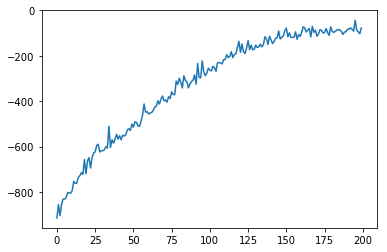

0  False  20  400
1  False  20  400
2  False  -5  400
3  False  -7  400
4  False  -6  400
5  False  -8  400
6  False  -1  400
7  False  20  400
8  False  -5  400
9  False  -5  400
10  False  -8  400
11  False  20  400
12  False  -6  400
13  False  -5  400
14  False  -3  400
15  False  -7  400
16  False  -2  400
17  False  -5  400
18  False  -7  400
19  False  -5  400
20  False  -1  400
21  False  -7  400
22  False  -7  400
23  False  20  400
24  False  -6  400
25  False  -7  400
26  False  -6  400
27  False  -7  400
28  False  -6  400
29  False  -7  400
30  False  -5  400
31  False  20  400
32  False  -6  400
33  False  -4  400
34  False  -6  400
35  False  20  400
36  False  -6  400
37  False  -7  400
38  False  -4  400
39  False  -7  400
40  False  -6  400
41  False  -7  400
42  False  -2  400
43  False  20  400
44  False  -1  400
45  False  -6  400
46  False  20  400
47  False  -8  400
48  False  -8  400
49  False  -4  400


In [35]:
plt.plot(range(len(epoch_scores)), epoch_scores)
plt.show()
first_best_policy = pool[-1]
for i in range(50):
    s = env.reset()
    total_reward = 0
    step_num = 0
    for ind in range(400):
        action = first_best_policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
        step_num += 1 
    print("{0}  {1}  {2}  {3}".format(i, is_done, reward, step_num))


In [ ]:
print("hello")

Ссылка на фидбек по семинару: [link](https://docs.google.com/forms/d/e/1FAIpQLSf-08wFrEke6zKlysETYiqAjH5CRXtOKut5Q77Tr5rdVId7zA/)

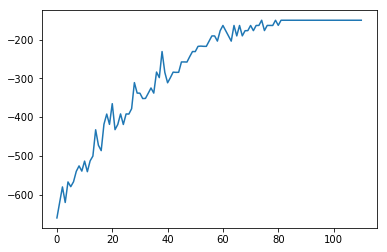

In [25]:
plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]

In [88]:
s = env.reset()
total_reward = 0
step_num = 0
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1

In [89]:
print(step_num, is_done, total_reward)

100 False -350


In [65]:
print(is_done)

False
